# 資料預處理:能使用list（文字）和array（計算）就不要用pandas，太慢囉

## 觀察

In [1]:
import numpy as np
import pandas as pd
import os

filepath = '/Users/mac/Desktop/Kaggle_datasets/Taxi_Duration/'
filename01 = 'train.csv'
filename02 = 'test.csv'
filename03 = 'sample_submission.csv'

df_train = pd.read_csv(os.path.join(filepath, filename01))
df_test = pd.read_csv(os.path.join(filepath, filename02))
df_ans = pd.read_csv(os.path.join(filepath, filename03))

In [2]:
df_train_copy = df_train
df_test_copy = df_test

In [3]:
df_train_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
id                    1458644 non-null object
vendor_id             1458644 non-null int64
pickup_datetime       1458644 non-null object
dropoff_datetime      1458644 non-null object
passenger_count       1458644 non-null int64
pickup_longitude      1458644 non-null float64
pickup_latitude       1458644 non-null float64
dropoff_longitude     1458644 non-null float64
dropoff_latitude      1458644 non-null float64
store_and_fwd_flag    1458644 non-null object
trip_duration         1458644 non-null int64
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [4]:
df_train_copy

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435
5,id0801584,2,2016-01-30 22:01:40,2016-01-30 22:09:03,6,-73.982857,40.742195,-73.992081,40.749184,N,443
6,id1813257,1,2016-06-17 22:34:59,2016-06-17 22:40:40,4,-73.969017,40.757839,-73.957405,40.765896,N,341
7,id1324603,2,2016-05-21 07:54:58,2016-05-21 08:20:49,1,-73.969276,40.797779,-73.922470,40.760559,N,1551
8,id1301050,1,2016-05-27 23:12:23,2016-05-27 23:16:38,1,-73.999481,40.738400,-73.985786,40.732815,N,255
9,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225


In [5]:
df_train_copy['delta_long'] = abs(df_train_copy['pickup_longitude']-df_train_copy['dropoff_longitude']) 
df_train_copy['delta_la'] = abs(df_train_copy['pickup_latitude']-df_train_copy['dropoff_latitude'])
df_train_copy['dist'] = np.sqrt(df_train_copy['delta_long']**2 + df_train_copy['delta_la']**2)

df_test_copy['delta_long'] = abs(df_test_copy['pickup_longitude']-df_test_copy['dropoff_longitude']) 
df_test_copy['delta_la'] = abs(df_test_copy['pickup_latitude']-df_test_copy['dropoff_latitude'])
df_test_copy['dist'] = np.sqrt(df_test_copy['delta_long']**2 + df_test_copy['delta_la']**2)

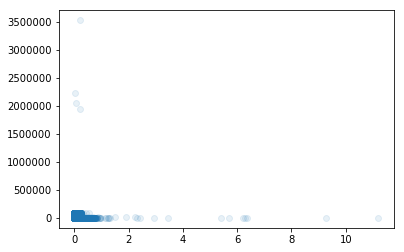

In [6]:
import matplotlib.pyplot as plt
plt.scatter(df_train_copy.dist, df_train_copy.trip_duration, alpha=0.1)
plt.show()

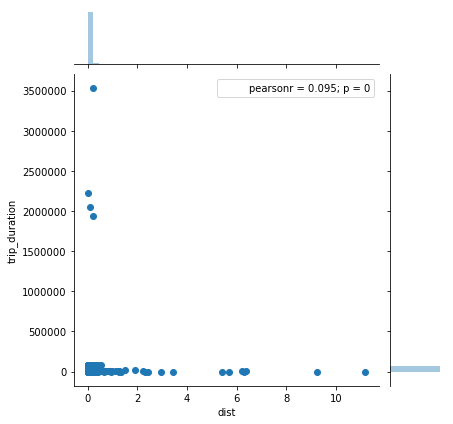

In [7]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

sns.jointplot(df_train_copy.dist, df_train_copy.trip_duration , data = df_train_copy)
plt.show()

In [17]:
df_train_copy[df_train_copy.dist>2]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,delta_long,delta_la,dist
184925,id2306955,1,2016-05-07 18:58:53,2016-05-07 19:12:05,1,-72.809669,51.881084,-73.987228,40.750599,N,792,1.177559,11.130486,11.192603
275644,id0978162,1,2016-02-24 16:20:59,2016-02-24 16:35:34,4,-75.354332,34.712234,-73.834923,32.181141,N,875,1.519409,2.531094,2.952124
377068,id0116374,1,2016-04-02 20:33:19,2016-04-02 20:38:01,1,-74.007095,40.717113,-76.963242,38.946033,N,282,2.956146,1.771080,3.446088
397526,id0982904,1,2016-04-28 13:32:14,2016-04-28 14:14:09,2,-73.870682,40.773598,-79.817978,38.963852,N,2515,5.947296,1.809746,6.216551
644165,id0401529,2,2016-06-02 15:19:35,2016-06-02 15:32:59,1,-73.980751,40.757111,-74.240051,38.478298,N,804,0.259300,2.278812,2.293518
910072,id1146400,1,2016-02-15 18:57:32,2016-02-15 19:02:35,2,-73.989914,40.756634,-70.346077,36.398121,N,303,3.643837,4.358513,5.681037
923793,id1001696,1,2016-02-24 21:02:32,2016-02-24 21:25:57,1,-73.972366,40.758633,-79.553535,43.674000,N,1405,5.581169,2.915367,6.296730
974378,id1510552,2,2016-01-06 20:40:52,2016-01-06 20:51:03,5,-71.799896,35.081532,-79.352837,40.436329,N,611,7.552940,5.354797,9.258551
1013474,id3626673,1,2016-05-05 18:02:50,2016-05-05 18:18:23,1,-73.978912,40.756763,-79.338699,41.427902,N,933,5.359787,0.671139,5.401643
1060807,id0838705,1,2016-02-26 19:50:03,2016-02-26 20:08:54,1,-66.972160,44.371944,-69.048019,43.147583,N,1131,2.075859,1.224361,2.410031


In [19]:
df_train_copy[df_train_copy.trip_duration>3000]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,delta_long,delta_la,dist
55,id3827863,2,2016-04-19 11:29:08,2016-04-19 12:27:56,3,-73.792892,40.657879,-73.809189,40.690182,N,3528,0.016296,0.032303,0.036181
354,id3402983,2,2016-06-30 15:48:06,2016-06-30 17:31:13,1,-73.781898,40.644772,-73.985893,40.760159,N,6187,0.203995,0.115387,0.234367
403,id2693863,1,2016-03-18 08:22:10,2016-03-18 09:47:19,1,-73.777184,40.646500,-73.985001,40.760918,N,5109,0.207817,0.114418,0.237233
531,id3307903,2,2016-02-20 04:03:06,2016-02-21 03:33:00,3,-74.008102,40.741489,-74.009956,40.714611,N,84594,0.001854,0.026878,0.026942
563,id3607196,2,2016-01-26 11:22:27,2016-01-26 12:20:57,1,-74.017250,40.708477,-73.979927,40.761356,N,3510,0.037323,0.052879,0.064724
861,id2029339,2,2016-01-22 14:13:46,2016-01-22 15:15:21,1,-73.873360,40.774109,-73.958115,40.775558,N,3695,0.084755,0.001450,0.084767
976,id3579210,2,2016-01-25 21:05:42,2016-01-25 22:01:52,1,-73.782089,40.644650,-73.974243,40.789761,N,3370,0.192154,0.145111,0.240791
1031,id1211472,1,2016-05-12 14:11:19,2016-05-12 15:03:16,1,-73.951576,40.791344,-73.789146,40.641678,Y,3117,0.162430,0.149666,0.220869
1057,id0631822,2,2016-05-17 14:17:48,2016-05-17 15:26:06,1,-73.995583,40.716949,-73.789101,40.642448,N,4098,0.206482,0.074501,0.219511
1101,id3913560,2,2016-01-11 22:48:55,2016-01-11 23:40:20,2,-74.012657,40.702179,-74.307762,40.567341,N,3085,0.295105,0.134838,0.324451


In [8]:
df_train_copy['vendor_id'].value_counts()

2    780302
1    678342
Name: vendor_id, dtype: int64

In [9]:
df_train_copy['store_and_fwd_flag'].value_counts()

N    1450599
Y       8045
Name: store_and_fwd_flag, dtype: int64

In [10]:
df_train_copy.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'delta_long', 'delta_la', 'dist'],
      dtype='object')

In [11]:
df_train_copy['trip_duration'].describe()

count    1.458644e+06
mean     9.594923e+02
std      5.237432e+03
min      1.000000e+00
25%      3.970000e+02
50%      6.620000e+02
75%      1.075000e+03
max      3.526282e+06
Name: trip_duration, dtype: float64

In [14]:
df_train_copy['dist'].describe()

count    1.458644e+06
mean     3.548232e-02
std      4.596807e-02
min      0.000000e+00
25%      1.258443e-02
50%      2.121671e-02
75%      3.840884e-02
max      1.119260e+01
Name: dist, dtype: float64

# 把上車時間轉換成數字，只取月份和小時

# 血淚教訓：List速度>>>pandas

In [8]:
from datetime import datetime

t = datetime.strptime(df_train_copy['pickup_datetime'][0], '%Y-%m-%d %H:%M:%S')
df_train_copy['month'][0] = t.month
df_train_copy['hour'][0] = t.hour

print(df_train_copy['month'][0])
print(df_train_copy['hour'][0])

KeyError: 'month'

In [10]:
from datetime import datetime

pickup_datetime = df_train_copy['pickup_datetime'].tolist()
month = []
hour = []

for i in range(len(df_train_copy)):
    t = datetime.strptime(pickup_datetime[i],'%Y-%m-%d %H:%M:%S')
    month.append(t.month)
    hour.append(t.hour)
    
    if i % 100000 == 0:
        print('already: ', i)

df_train_copy['month'] = month
df_train_copy['hour'] = hour


already:  0
already:  10000
already:  20000
already:  30000
already:  40000
already:  50000
already:  60000
already:  70000
already:  80000
already:  90000
already:  100000
already:  110000
already:  120000
already:  130000
already:  140000
already:  150000
already:  160000
already:  170000
already:  180000
already:  190000
already:  200000
already:  210000
already:  220000
already:  230000
already:  240000
already:  250000
already:  260000
already:  270000
already:  280000
already:  290000
already:  300000
already:  310000
already:  320000
already:  330000
already:  340000
already:  350000
already:  360000
already:  370000
already:  380000
already:  390000
already:  400000
already:  410000
already:  420000
already:  430000
already:  440000
already:  450000
already:  460000
already:  470000
already:  480000
already:  490000
already:  500000
already:  510000
already:  520000
already:  530000
already:  540000
already:  550000
already:  560000
already:  570000
already:  580000
already:  5

In [11]:
df_train_copy

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,delta_long,delta_la,dist,month,hour
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,0.017525,0.002335,0.017680,3,17
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,0.019066,0.007412,0.020456,6,0
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,0.026306,0.053852,0.059934,1,11
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,0.002228,0.013252,0.013438,4,19
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,0.000130,0.010689,0.010690,3,13
5,id0801584,2,2016-01-30 22:01:40,2016-01-30 22:09:03,6,-73.982857,40.742195,-73.992081,40.749184,N,443,0.009224,0.006989,0.011572,1,22
6,id1813257,1,2016-06-17 22:34:59,2016-06-17 22:40:40,4,-73.969017,40.757839,-73.957405,40.765896,N,341,0.011612,0.008057,0.014133,6,22
7,id1324603,2,2016-05-21 07:54:58,2016-05-21 08:20:49,1,-73.969276,40.797779,-73.922470,40.760559,N,1551,0.046806,0.037220,0.059801,5,7
8,id1301050,1,2016-05-27 23:12:23,2016-05-27 23:16:38,1,-73.999481,40.738400,-73.985786,40.732815,N,255,0.013695,0.005585,0.014790,5,23
9,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225,0.008049,0.045650,0.046355,3,21


In [13]:
from datetime import datetime

pickup_datetime_test = df_test_copy['pickup_datetime'].tolist()
month = []
hour = []

for i in range(len(df_test_copy)):
    t = datetime.strptime(pickup_datetime_test[i],'%Y-%m-%d %H:%M:%S')
    month.append(t.month)
    hour.append(t.hour)
    
    if i % 100000 == 0:
        print('already: ', i)

df_test_copy['month'] = month
df_test_copy['hour'] = hour

already:  0
already:  10000
already:  20000
already:  30000
already:  40000
already:  50000
already:  60000
already:  70000
already:  80000
already:  90000
already:  100000
already:  110000
already:  120000
already:  130000
already:  140000
already:  150000
already:  160000
already:  170000
already:  180000
already:  190000
already:  200000
already:  210000
already:  220000
already:  230000
already:  240000
already:  250000
already:  260000
already:  270000
already:  280000
already:  290000
already:  300000
already:  310000
already:  320000
already:  330000
already:  340000
already:  350000
already:  360000
already:  370000
already:  380000
already:  390000
already:  400000
already:  410000
already:  420000
already:  430000
already:  440000
already:  450000
already:  460000
already:  470000
already:  480000
already:  490000
already:  500000
already:  510000
already:  520000
already:  530000
already:  540000
already:  550000
already:  560000
already:  570000
already:  580000
already:  5

In [14]:
df_test_copy

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,delta_long,delta_la,dist,month,hour
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N,0.002045,0.024651,0.024735,6,23
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N,0.004395,0.024590,0.024979,6,23
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N,0.011276,0.008060,0.013861,6,23
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N,0.030357,0.041431,0.051363,6,23
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N,0.008705,0.005585,0.010343,6,23
5,id0668992,1,2016-06-30 23:59:30,1,-73.991302,40.749798,-73.980515,40.786549,N,0.010788,0.036751,0.038301,6,23
6,id1765014,1,2016-06-30 23:59:15,1,-73.978310,40.741550,-73.952072,40.717003,N,0.026237,0.024548,0.035930,6,23
7,id0898117,1,2016-06-30 23:59:09,2,-74.012711,40.701527,-73.986481,40.719509,N,0.026230,0.017982,0.031802,6,23
8,id3905224,2,2016-06-30 23:58:55,2,-73.992332,40.730511,-73.875618,40.875214,N,0.116714,0.144703,0.185906,6,23
9,id1543102,2,2016-06-30 23:58:46,1,-73.993179,40.748760,-73.979309,40.761311,N,0.013870,0.012550,0.018705,6,23


# 整理所需參數

In [15]:
df_train_para = df_train_copy[['vendor_id', 'passenger_count','store_and_fwd_flag',
                               'trip_duration','dist','month','hour']]

df_test_para = df_test_copy[['vendor_id', 'passenger_count','store_and_fwd_flag',
                             'dist','month','hour']]

In [22]:
df_train_para['month'].value_counts()

3    256189
4    251645
5    248487
2    238300
6    234316
1    229707
Name: month, dtype: int64

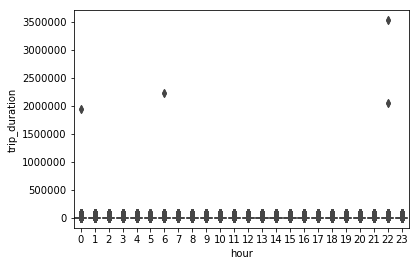

In [25]:
sns.boxplot(df_train_para['hour'], df_train_para['trip_duration'])
plt.show()

In [23]:
df_test_para['month'].value_counts()

3    109697
5    107570
4    107432
2    102314
6    100445
1     97676
Name: month, dtype: int64

# 剔除outlier

In [31]:
df_train_s = df_train_para[(df_train_para.trip_duration < 2500) &
                           (df_train_para.dist < 0.04) &
                           (df_train_para.dist > 0.01) ]

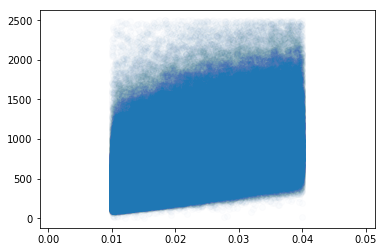

In [32]:
import matplotlib.pyplot as plt
plt.scatter(df_train_s.dist, df_train_s.trip_duration, alpha=0.01)
plt.show()

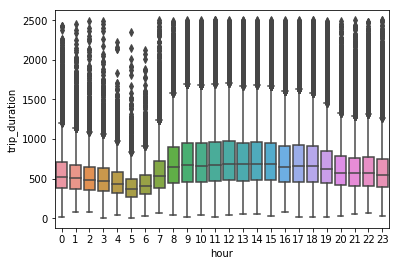

In [33]:
sns.boxplot(df_train_s['hour'], df_train_s['trip_duration'])
plt.show()

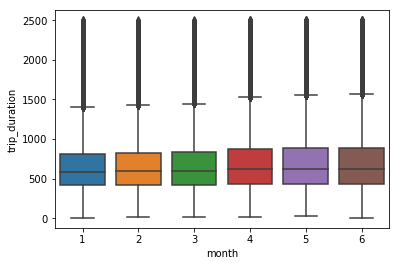

In [34]:
sns.boxplot(df_train_s['month'], df_train_s['trip_duration'])
plt.show()

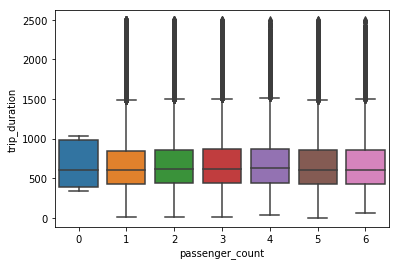

In [53]:
sns.boxplot(df_train_s['passenger_count'], df_train_s['trip_duration'])
plt.show()

In [54]:
df_train_s['passenger_count'].value_counts()

1    620561
2    124453
5     46437
3     35956
6     29012
4     16811
0         5
Name: passenger_count, dtype: int64

In [35]:
df_train_s['trip_duration'].describe()

count    873235.000000
mean        675.163420
std         344.399329
min           4.000000
25%         425.000000
50%         606.000000
75%         850.000000
max        2499.000000
Name: trip_duration, dtype: float64

In [36]:
df_train_s['dist'].describe()

count    873235.000000
mean          0.021175
std           0.007947
min           0.010000
25%           0.014457
50%           0.019651
75%           0.026826
max           0.040000
Name: dist, dtype: float64

In [38]:
df_test_para

,vendor_id,passenger_count,store_and_fwd_flag,dist,month,hour
0,1,1,N,0.024735,6,23
1,1,1,N,0.024979,6,23
2,1,1,N,0.013861,6,23
3,2,1,N,0.051363,6,23
4,1,1,N,0.010343,6,23
5,1,1,N,0.038301,6,23
6,1,1,N,0.035930,6,23
7,1,2,N,0.031802,6,23
8,2,2,N,0.185906,6,23
9,2,1,N,0.018705,6,23


In [40]:
df_test_para['vendor_id'].value_counts()

2    334374
1    290760
Name: vendor_id, dtype: int64

In [41]:
df_test_para['store_and_fwd_flag'].value_counts()

N    621704
Y      3430
Name: store_and_fwd_flag, dtype: int64

In [42]:
df_test_para['dist'].describe()

count    625134.000000
mean          0.035400
std           0.045585
min           0.000000
25%           0.012590
50%           0.021216
75%           0.038454
max          10.385000
Name: dist, dtype: float64

In [43]:
df_ans.head()

,id,trip_duration
0,id3004672,959
1,id3505355,959
2,id1217141,959
3,id2150126,959
4,id1598245,959


In [245]:
df_ans[df_ans.id == 0]

,id,trip_duration
2892,0,1.0
2991,0,1.0
9325,0,1.0
9414,0,1.0
9419,0,1.0
9440,0,1.0
9441,0,1.0
12383,0,1.0
12473,0,1.0
14891,0,1.0


## 製作feature和labels：vendor,flag,month,hour做onehot_encoding

In [55]:
df_train_feature = df_train_s[['vendor_id','store_and_fwd_flag','dist','month','hour']]
df_train_label = df_train_s['trip_duration']

df_test_feature = df_test_para[['vendor_id','store_and_fwd_flag','dist','month','hour']]

In [56]:
df_train_feature = pd.get_dummies(data=df_train_feature, 
                                  columns=['vendor_id','store_and_fwd_flag',
                                           'month','hour'])

df_test_feature = pd.get_dummies(data=df_test_feature, 
                                  columns=['vendor_id','store_and_fwd_flag',
                                           'month','hour'])

In [57]:
df_train_feature.head()

,dist,vendor_id_1,vendor_id_2,store_and_fwd_flag_N,store_and_fwd_flag_Y,month_1,month_2,month_3,month_4,month_5,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,0.017680,0,1,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0.020456,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.013438,0,1,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,0.010690,0,1,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0.011572,0,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [58]:
df_train_feature.columns

Index(['dist', 'vendor_id_1', 'vendor_id_2', 'store_and_fwd_flag_N',
       'store_and_fwd_flag_Y', 'month_1', 'month_2', 'month_3', 'month_4',
       'month_5', 'month_6', 'hour_0', 'hour_1', 'hour_2', 'hour_3', 'hour_4',
       'hour_5', 'hour_6', 'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11',
       'hour_12', 'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17',
       'hour_18', 'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23'],
      dtype='object')

In [62]:
df_train_feature['dist'].describe()

count    873235.000000
mean          0.021175
std           0.007947
min           0.010000
25%           0.014457
50%           0.019651
75%           0.026826
max           0.040000
Name: dist, dtype: float64

In [59]:
df_test_feature.head()

,dist,vendor_id_1,vendor_id_2,store_and_fwd_flag_N,store_and_fwd_flag_Y,month_1,month_2,month_3,month_4,month_5,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,0.024735,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0.024979,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0.013861,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0.051363,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0.010343,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [60]:
df_test_feature.columns

Index(['dist', 'vendor_id_1', 'vendor_id_2', 'store_and_fwd_flag_N',
       'store_and_fwd_flag_Y', 'month_1', 'month_2', 'month_3', 'month_4',
       'month_5', 'month_6', 'hour_0', 'hour_1', 'hour_2', 'hour_3', 'hour_4',
       'hour_5', 'hour_6', 'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11',
       'hour_12', 'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17',
       'hour_18', 'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23'],
      dtype='object')

In [61]:
df_test_feature['dist'].describe()

count    625134.000000
mean          0.035400
std           0.045585
min           0.000000
25%           0.012590
50%           0.021216
75%           0.038454
max          10.385000
Name: dist, dtype: float64

In [141]:
train_feature = df_train_feature.values
test_feature = df_test_feature.values
train_label = df_train_label.values

In [130]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
train_feature_trans = min_max_scaler.fit_transform(train_feature.reshape(-1,35))
test_feature_trans = min_max_scaler.fit_transform(test_feature.reshape(-1,35))

In [123]:
train_feature_trans[0]

array([ 0.25598384,  0.        ,  1.        ,  1.        ,  0.        ,
        0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ])

In [118]:
train_feature.shape

(873235, 35)

In [132]:
test_feature_trans[0]

array([ 0.00238182,  1.        ,  0.        ,  1.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  1.        ])

In [67]:
train_label = train_label.reshape(-1,1)

In [68]:
train_label

array([[455],
       [663],
       [429],
       ..., 
       [778],
       [373],
       [198]])

# 跑模型囉！！

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_73 (Dense)             (None, 100)               3600      
_________________________________________________________________
dropout_54 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_74 (Dense)             (None, 100)               10100     
_________________________________________________________________
dropout_55 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_75 (Dense)             (None, 50)                5050      
_________________________________________________________________
dropout_56 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_76 (Dense)             (None, 1)                 51        
Total para

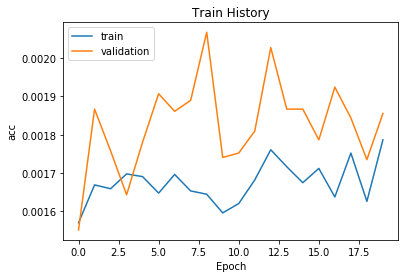

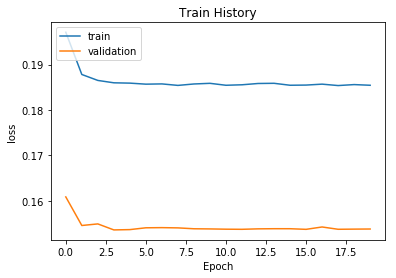

model saved to disk


In [190]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()


######################### 建立模型
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.models import load_model

model = Sequential()

model.add(Dense(units=100, 
                input_dim=35,
                kernel_initializer='uniform'))
model.add(Dropout(0.5))

model.add(Dense(units=100,
                kernel_initializer='uniform'))
model.add(Dropout(0.5))

model.add(Dense(units=50,
                kernel_initializer='uniform'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

print(model.summary())

#可以反覆訓練fine tune
weights_path = 'Savemodels/TaxiDuration(Kaggles)_MLP.h5'
model.load_weights(weights_path)

model.compile(loss='mean_squared_logarithmic_error',   
              optimizer='adam', metrics=['accuracy'])

train_history = model.fit(train_feature, train_label,
                          validation_split=0.2, epochs=20, batch_size=50000, verbose=2) 


######################### 訓練過程視覺化
show_train_history(train_history,'acc','val_acc')
show_train_history(train_history,'loss','val_loss')

#儲存訓練結果
model.save_weights("Savemodels/TaxiDuration(Kaggles)_MLP.h5")
print('model saved to disk')

In [233]:
prediction = model.predict(test_feature)

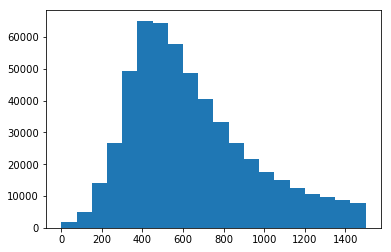

In [234]:
import matplotlib.pyplot as plt
plt.hist(prediction, range=(0,1500), bins = 20)
plt.show()

In [235]:
prediction[0]

array([ 658.69891357], dtype=float32)

In [236]:
prediction<0

array([[False],
       [False],
       [False],
       ..., 
       [False],
       [False],
       [False]], dtype=bool)

In [237]:
df_ans['trip_duration'] = prediction

In [238]:
df_ans

,id,trip_duration
0,id3004672,658.698914
1,id3505355,664.361084
2,id1217141,406.257385
3,id2150126,1276.813354
4,id1598245,324.580902
5,id0668992,973.631470
6,id1765014,918.587402
7,id0898117,822.753113
8,id3905224,4400.172363
9,id1543102,518.692566


In [239]:
df_ans['trip_duration'].describe()

count    625134.000000
mean        961.263977
std        1055.356079
min         -75.861900
25%         443.087776
50%         641.375122
75%        1030.174469
max      241286.125000
Name: trip_duration, dtype: float64

In [240]:
df_ans[df_ans['trip_duration']>900]

,id,trip_duration
3,id2150126,1276.813354
5,id0668992,973.631470
6,id1765014,918.587402
8,id3905224,4400.172363
10,id3024712,1077.243774
14,id3376065,1412.667114
15,id3008739,1207.490112
16,id0902216,1037.971436
19,id0775088,1438.441162
23,id1345524,1143.043579


In [242]:
df_ans[df_ans.trip_duration<0]

,id,trip_duration
2892,0,-12.690598
2991,0,-31.010937
9325,0,-10.982977
9414,0,-41.040585
9419,0,-39.292061
9440,0,-3.148615
9441,0,-30.874996
12383,0,-12.909513
12473,0,-41.011528
14891,0,-13.086611


In [243]:
ans = df_ans['trip_duration'].tolist()

for i in range(len(ans)):
    if ans[i] < 0:
        ans[i] = 1
        
df_ans['trip_duration'] = ans

In [244]:
df_ans[df_ans['id']==0]

,id,trip_duration
2892,0,1.0
2991,0,1.0
9325,0,1.0
9414,0,1.0
9419,0,1.0
9440,0,1.0
9441,0,1.0
12383,0,1.0
12473,0,1.0
14891,0,1.0


In [246]:
df_ans.to_csv('TaxiDuration_ans.csv',mode = 'w', index=False)